[View in Colaboratory](https://colab.research.google.com/github/meaninginuse/PythonForFinance/blob/master/2018-10-13_PCA.ipynb)

In [0]:
symbols = ['MMM','AXP','AAPL','BA','CAT','CVX', 'CSCO', 'KO', 'DWDP', 'XOM', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD','MRK', 'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UNH', 'UTX', 'VZ', 'WMT', 'WBA', 'DIS', 'DIA']
        

In [0]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
#pyplot had to be imported

In [0]:
!pip install -q pandas_datareader
import pandas_datareader as web
#install package each time - can't call pandas directly

In [40]:
%%time
data = pd.DataFrame()
for sym in symbols:
 data[sym] = web.DataReader(sym, data_source='iex', start='2017,01,09',end='2018,10,12')['close']
data = data.dropna()
#protects data by droping missing value
#something here is limiting my pull to year 

CPU times: user 565 ms, sys: 38.5 ms, total: 604 ms
Wall time: 6.67 s


In [0]:
dji = pd.DataFrame(data.pop('DIA'))
#pulls DIA returns with a date key

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 281 entries, 2017-09-01 to 2018-10-12
Data columns (total 29 columns):
MMM     281 non-null float64
AXP     281 non-null float64
AAPL    281 non-null float64
BA      281 non-null float64
CAT     281 non-null float64
CVX     281 non-null float64
CSCO    281 non-null float64
KO      281 non-null float64
DWDP    281 non-null float64
XOM     281 non-null float64
GS      281 non-null float64
HD      281 non-null float64
IBM     281 non-null float64
INTC    281 non-null float64
JNJ     281 non-null float64
JPM     281 non-null float64
MCD     281 non-null float64
MRK     281 non-null float64
MSFT    281 non-null float64
NKE     281 non-null float64
PFE     281 non-null float64
PG      281 non-null float64
TRV     281 non-null float64
UNH     281 non-null float64
UTX     281 non-null float64
VZ      281 non-null float64
WMT     281 non-null float64
WBA     281 non-null float64
DIS     281 non-null float64
dtypes: float64(29)
memory usage: 75.9+ KB


In [7]:
data[data.columns[:6]].head()

,MMM,AXP,AAPL,BA,CAT,CVX
date,,,,,,
2017-09-01,198.6518,84.5773,161.6064,235.5262,115.7395,104.7626
2017-09-05,196.1340,83.7623,159.6658,232.2627,115.7591,105.4176
2017-09-06,197.1782,83.6838,159.4983,229.9303,114.4674,107.6812
2017-09-07,199.5301,82.8786,158.8580,231.5865,115.2405,107.6908
2017-09-08,200.7304,82.7215,156.2672,234.0072,115.2894,106.7083


In [38]:
data['MMM']

date
2017-09-01    198.6518
2017-09-05    196.1340
2017-09-06    197.1782
2017-09-07    199.5301
2017-09-08    200.7304
2017-09-11    204.5071
2017-09-12    204.5852
2017-09-13    204.4388
2017-09-14    206.3320
2017-09-15    208.2057
2017-09-18    208.6058
2017-09-19    208.4107
2017-09-20    205.4342
2017-09-21    205.3659
2017-09-22    205.6782
2017-09-25    205.6489
2017-09-26    205.9417
2017-09-27    204.4290
2017-09-28    204.4974
2017-09-29    204.8389
2017-10-02    207.6300
2017-10-03    209.3963
2017-10-04    211.2993
2017-10-05    211.1529
2017-10-06    211.2993
2017-10-09    211.4554
2017-10-10    211.5238
2017-10-11    211.2895
2017-10-12    212.3435
2017-10-13    212.4704
                ...   
2018-08-31    210.9200
2018-09-04    208.6000
2018-09-05    211.8300
2018-09-06    212.7400
2018-09-07    212.5700
2018-09-10    212.9300
2018-09-11    211.7800
2018-09-12    206.7100
2018-09-13    209.0500
2018-09-14    207.8800
2018-09-17    209.5300
2018-09-18    211.5300
2018-0

In [0]:
#APPLYING PCA

In [0]:
scale_function = lambda x: (x - x.mean()) / x.std()
#function 
# I don't get how this 'normalizes' the data

In [0]:
pca = KernelPCA().fit(data.apply(scale_function))
#from scikit learn module

In [11]:
len(pca.lambdas_)
#these are eigenvalues

131

In [12]:
pca.lambdas_[:10].round()
#look at first 10 components

array([3689., 1784., 1295.,  432.,  181.,  146.,  117.,   92.,   74.,
         58.])

In [0]:
get_we = lambda x: x / x.sum()
#this is a function

In [14]:
get_we(pca.lambdas_)[:10]
#first 10 elements returns 97% of 100% of competents

array([0.45432925, 0.21974551, 0.15953948, 0.0532227 , 0.02232917,
       0.01795905, 0.01440558, 0.01132526, 0.0091013 , 0.00714747])

In [0]:
#Constructing a PCA Index

In [0]:
pca = KernelPCA(n_components=1).fit(data.apply(scale_function))
dji['PCA_1'] = pca.transform(-data)
#pca is a sklearn kernelPCA
#we have on component here

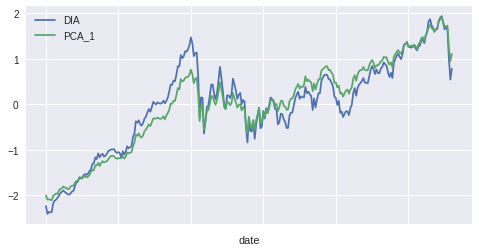

In [17]:
%matplotlib inline
dji.apply(scale_function).plot(figsize=(8, 4))

In [0]:
pca = KernelPCA(n_components=5).fit(data.apply(scale_function))
pca_components = pca.transform(-data)
weights = get_we(pca.lambdas_)
dji['PCA_5'] = np.dot(pca_components, weights)


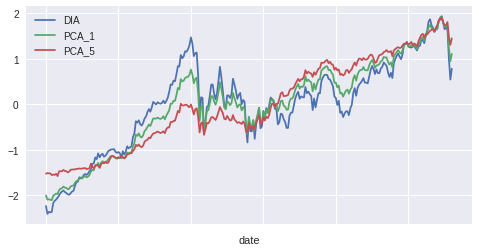

In [19]:
%matplotlib inline
dji.apply(scale_function).plot(figsize=(8, 4))
# the additional 4 components come closer to the DIA

In [0]:
import matplotlib as mpl
mpl_dates = pd.to_datetime(data.index)
#trying to return a numeric date

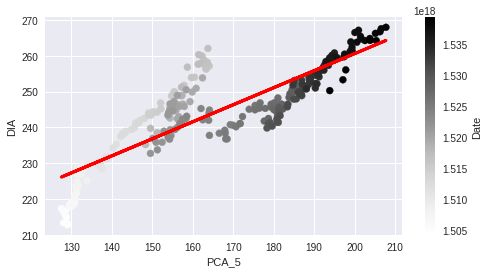

In [28]:
plt.figure(figsize=(8, 4))
plt.scatter(dji['PCA_5'], dji['DIA'], c=mpl_dates)
lin_reg = np.polyval(np.polyfit(dji['PCA_5'], dji['DIA'], 1), dji['PCA_5'])
plt.plot(dji['PCA_5'], lin_reg, 'r', lw=3)
plt.grid(True)
plt.xlabel('PCA_5')
plt.ylabel('DIA')
plt.colorbar(label='Date')
#i don't understand date formats
#this is a kinda useless without dates

In [44]:
cut_date = '2018/02/08'
early_pca = dji[dji.index < cut_date]['PCA_5']
early_reg = np.polyval(np.polyfit(early_pca, dji['DIA'][dji.index < cut_date], 1), early_pca)

late_pca = dji[dji.index >= cut_date]['PCA_5']
late_reg = np.polyval(np.polyfit(late_pca, dji['DIA'][dji.index >= cut_date], 1),late_pca)

TypeError: ignored

NameError: ignored

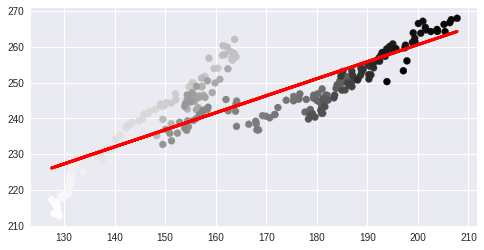

In [46]:
plt.figure(figsize=(8, 4))
plt.scatter(dji['PCA_5'], dji['DIA'], c=mpl_dates)
plt.plot(early_pca, early_reg, 'r', lw=3)
plt.plot(late_pca, late_reg, 'r', lw=3)
plt.grid(True)
plt.xlabel('PCA_5')
plt.ylabel('DIA')
plt.colorbar(ticks=mpl.dates.DayLocator(interval=250),
format=mpl.dates.DateFormatter('%d %b %y'))